In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
seed=42
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv('risk_factors_cervical_cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(858, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['Number of sexual partners'] = pd.to_numeric(df['Number of sexual partners'], errors='coerce')
df['First sexual intercourse'] = pd.to_numeric(df['First sexual intercourse'], errors='coerce')
df['Num of pregnancies'] = pd.to_numeric(df['Num of pregnancies'], errors='coerce')
df['Smokes'] = pd.to_numeric(df['Smokes'], errors='coerce')
df['Smokes (years)'] = pd.to_numeric(df['Smokes (years)'], errors='coerce')
df['Smokes (packs/year)'] = pd.to_numeric(df['Smokes (packs/year)'], errors='coerce')
df['Hormonal Contraceptives'] = pd.to_numeric(df['Hormonal Contraceptives'], errors='coerce')
df['Hormonal Contraceptives (years)'] = pd.to_numeric(df['Hormonal Contraceptives (years)'], errors='coerce')
df['IUD'] = pd.to_numeric(df['IUD'], errors='coerce')
df['IUD (years)'] = pd.to_numeric(df['IUD (years)'], errors='coerce')
df['STDs'] = pd.to_numeric(df['STDs'], errors='coerce')
df['STDs (number)'] = pd.to_numeric(df['STDs (number)'], errors='coerce')
df['STDs:condylomatosis'] = pd.to_numeric(df['STDs:condylomatosis'], errors='coerce')
df['STDs:cervical condylomatosis'] = pd.to_numeric(df['STDs:cervical condylomatosis'], errors='coerce')
df['STDs:vaginal condylomatosis'] = pd.to_numeric(df['STDs:vaginal condylomatosis'], errors='coerce')
df['STDs:vulvo-perineal condylomatosis'] = pd.to_numeric(df['STDs:vulvo-perineal condylomatosis'], errors='coerce')
df['STDs:syphilis'] = pd.to_numeric(df['STDs:syphilis'], errors='coerce')
df['STDs:pelvic inflammatory disease'] = pd.to_numeric(df['STDs:pelvic inflammatory disease'], errors='coerce')
df['STDs:genital herpes'] = pd.to_numeric(df['STDs:genital herpes'], errors='coerce')
df['STDs:molluscum contagiosum'] = pd.to_numeric(df['STDs:molluscum contagiosum'], errors='coerce')
df['STDs:AIDS'] = pd.to_numeric(df['STDs:AIDS'], errors='coerce')
df['STDs:HIV'] = pd.to_numeric(df['STDs:HIV'], errors='coerce')
df['STDs:Hepatitis B'] = pd.to_numeric(df['STDs:Hepatitis B'], errors='coerce')
df['STDs:HPV'] = pd.to_numeric(df['STDs:HPV'], errors='coerce')

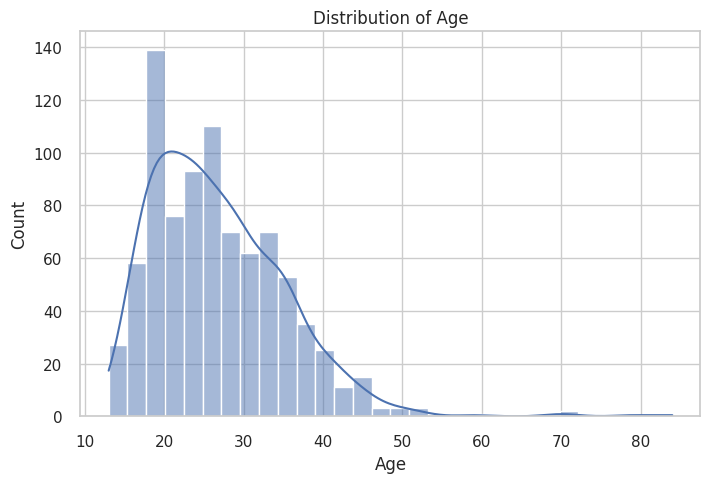

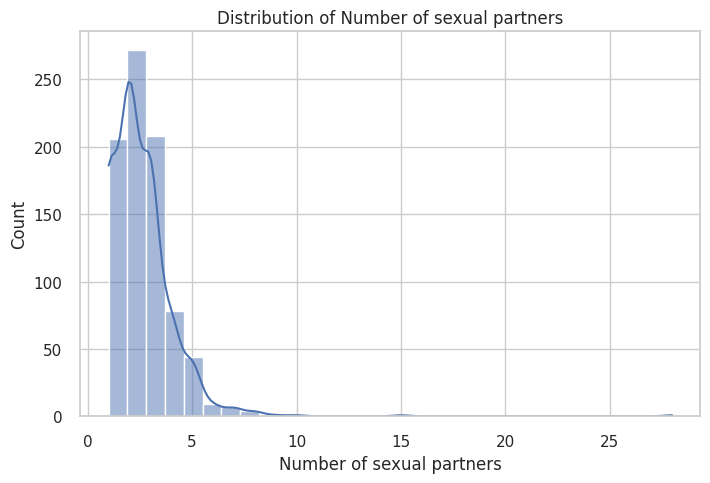

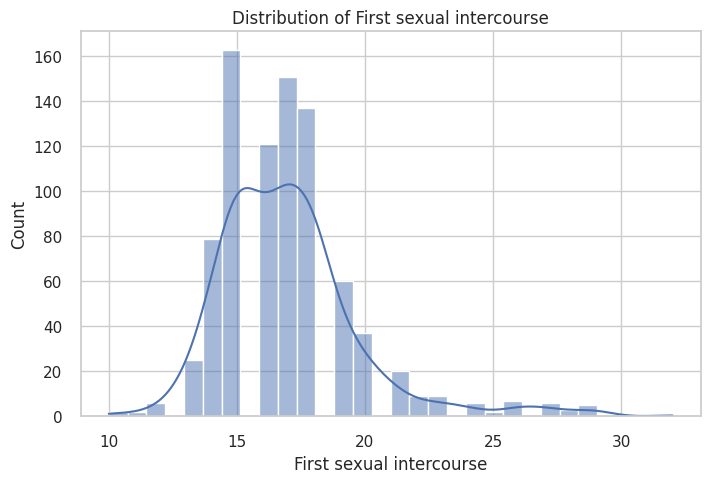

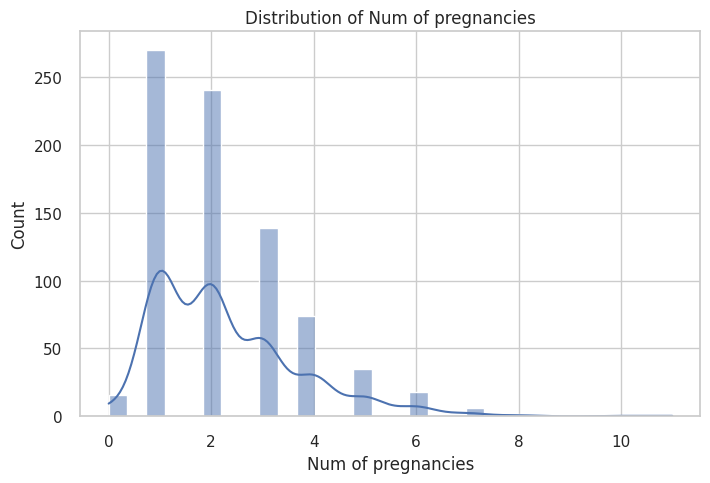

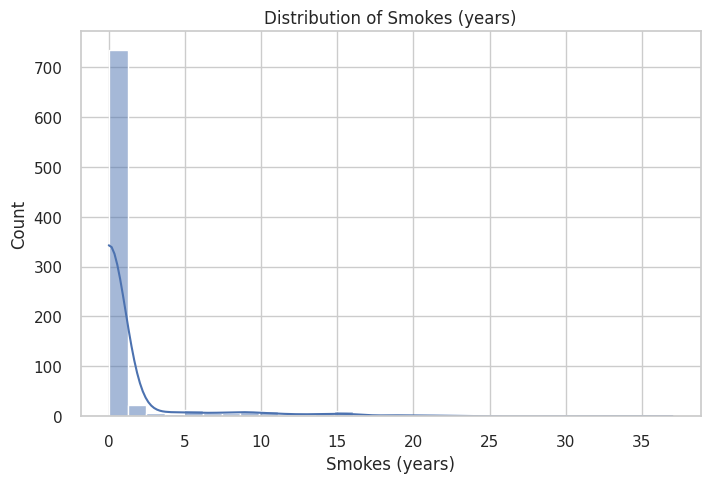

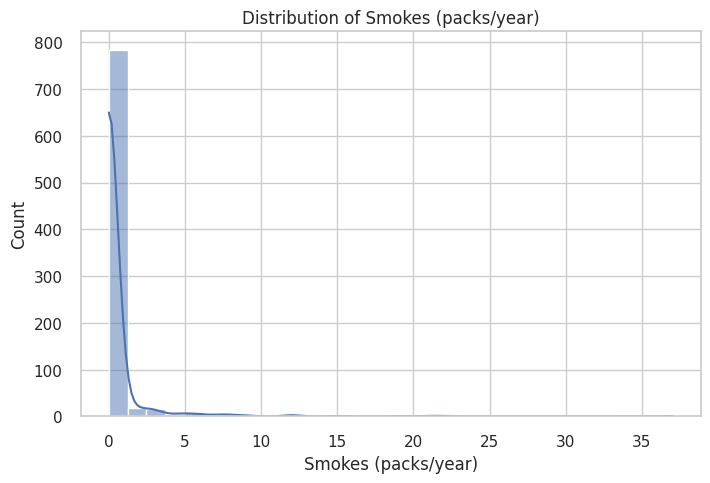

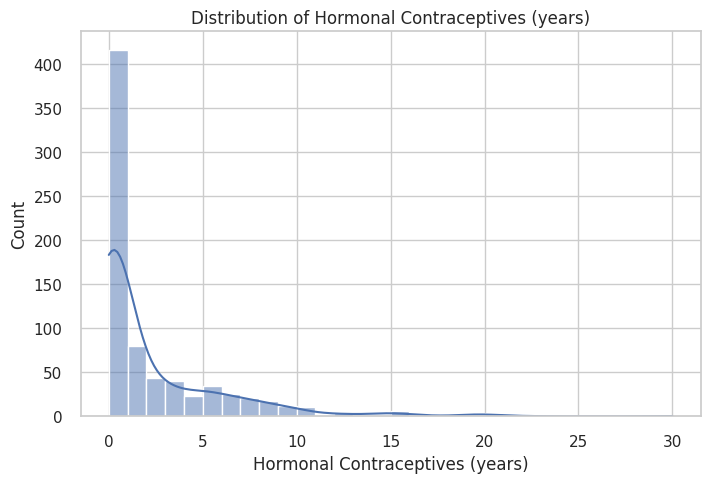

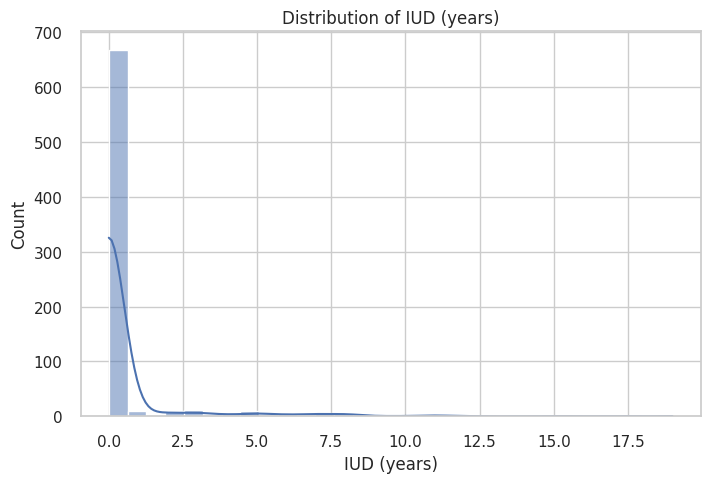

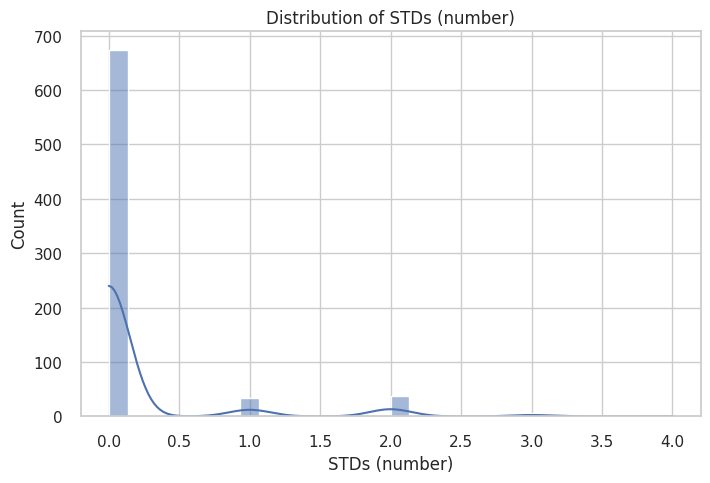

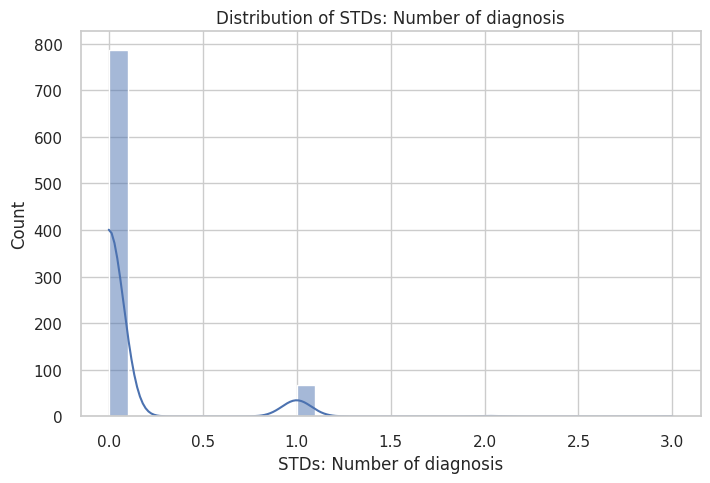

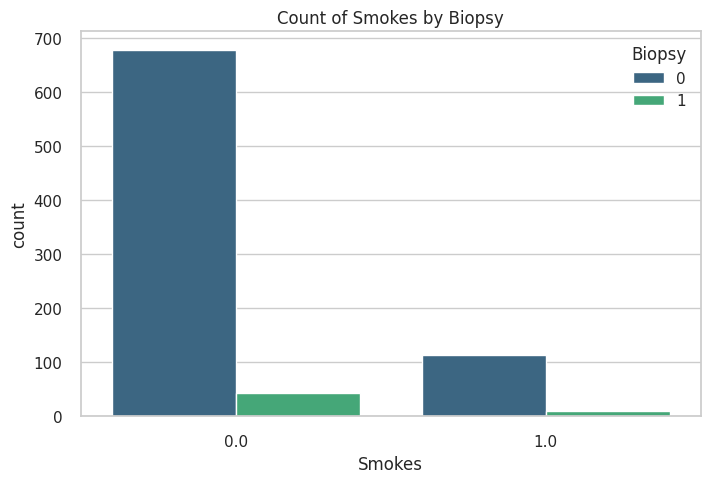

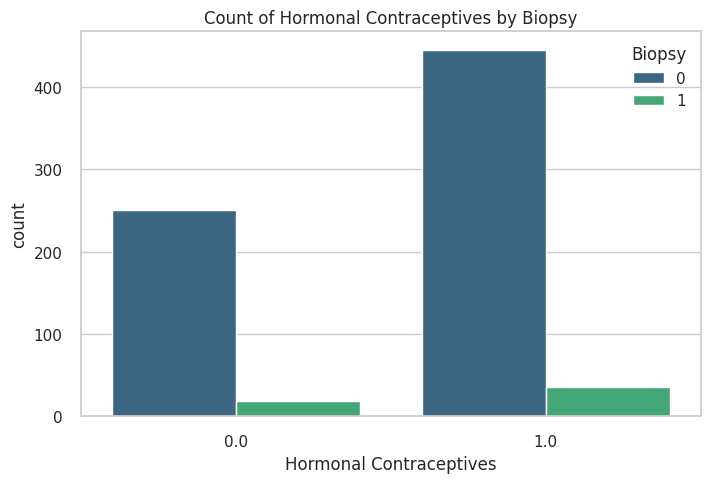

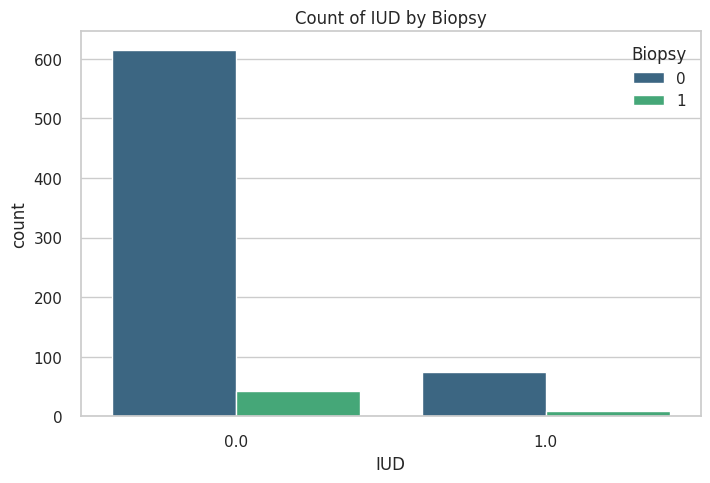

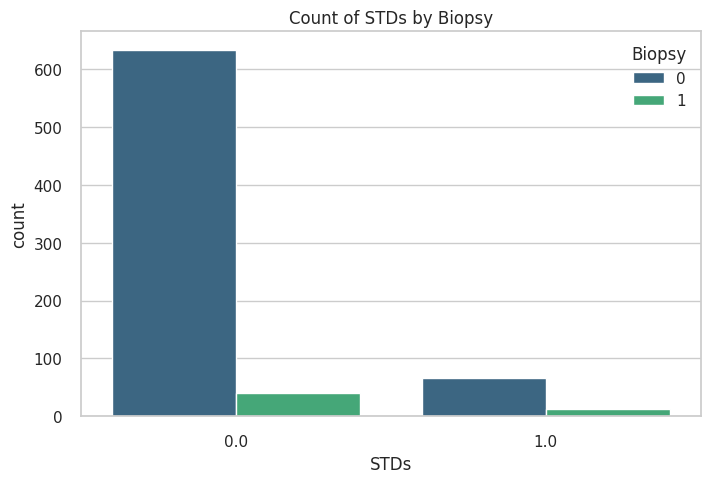

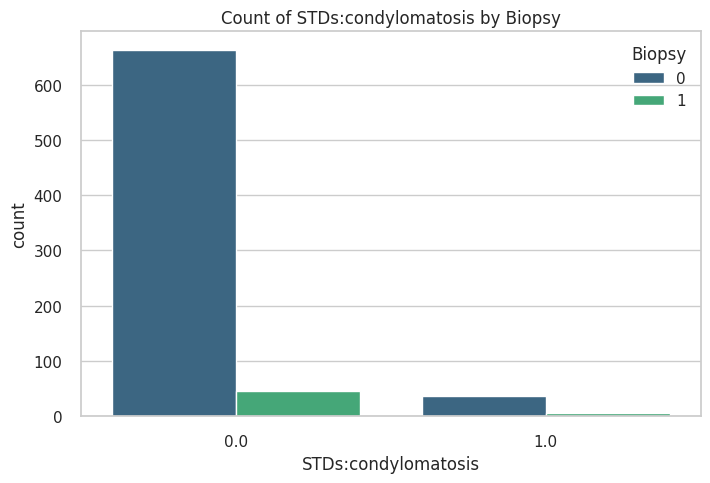

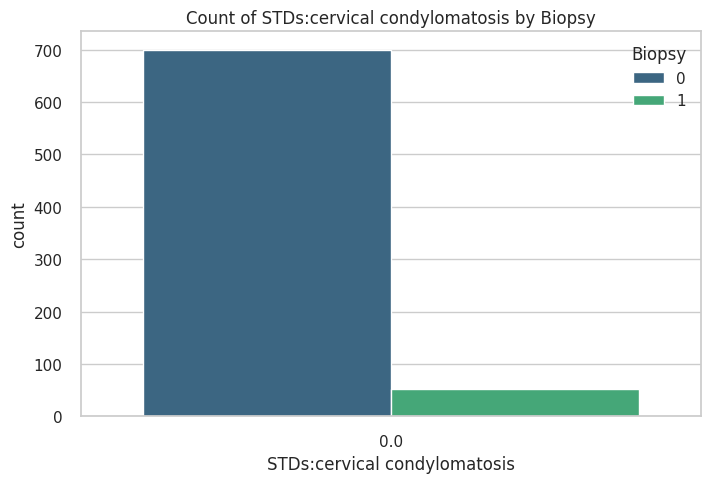

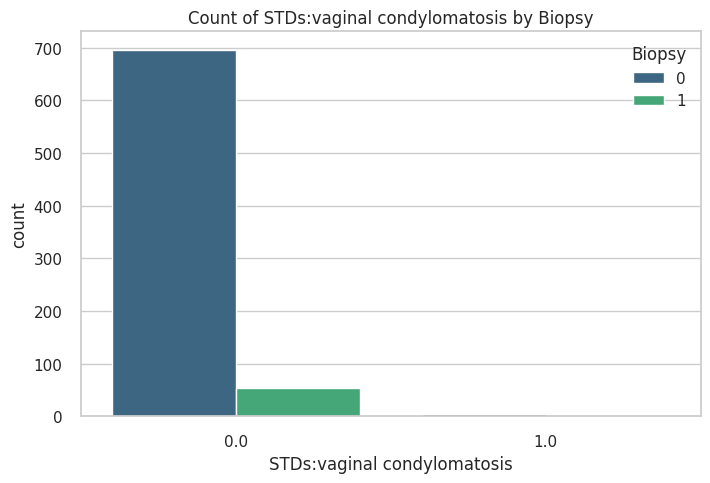

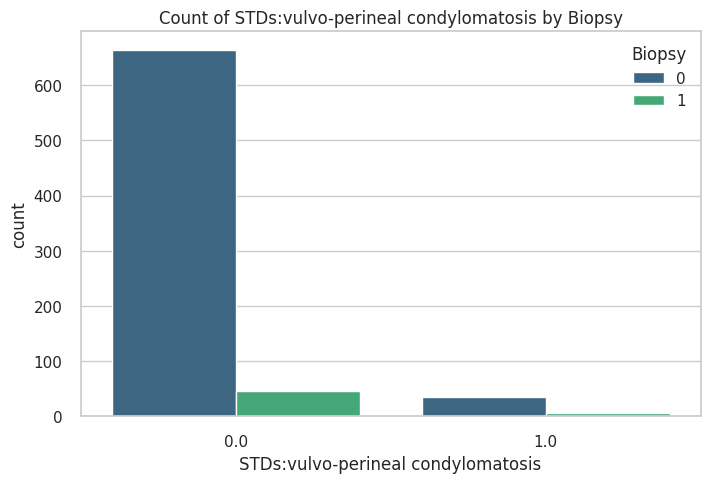

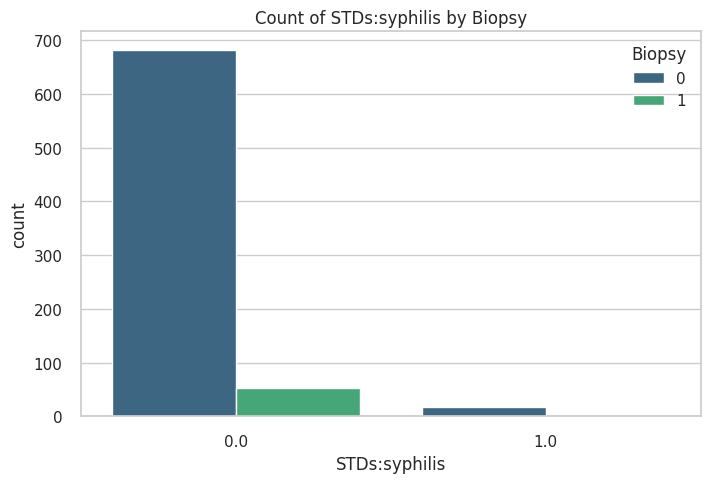

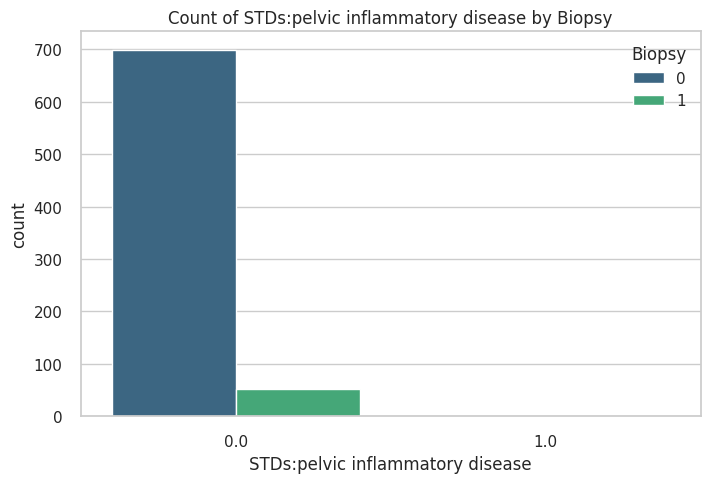

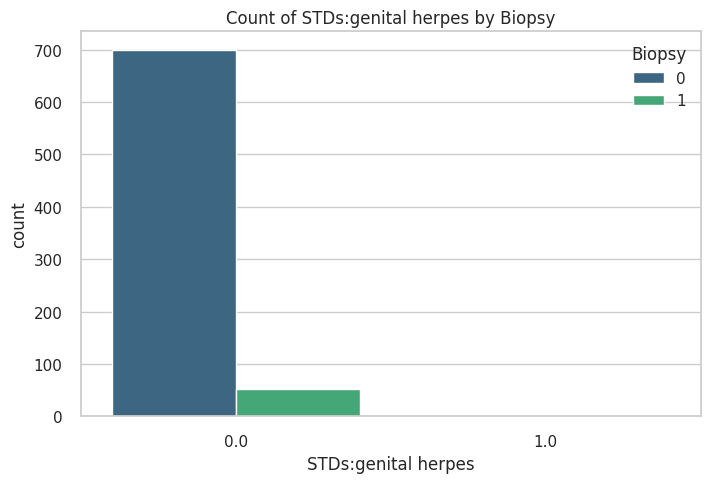

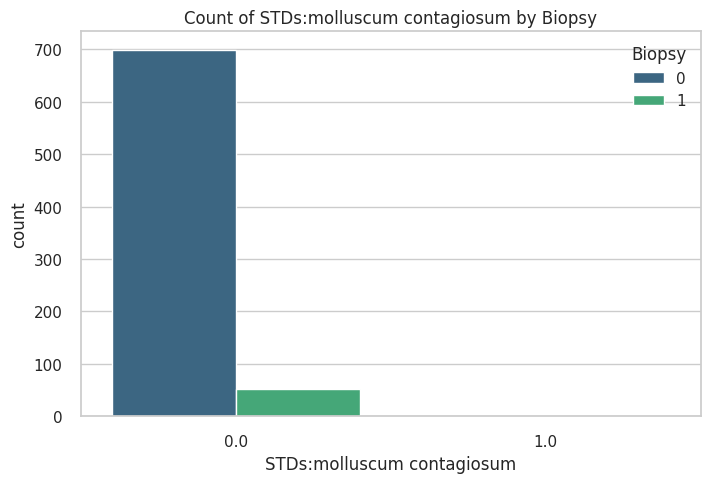

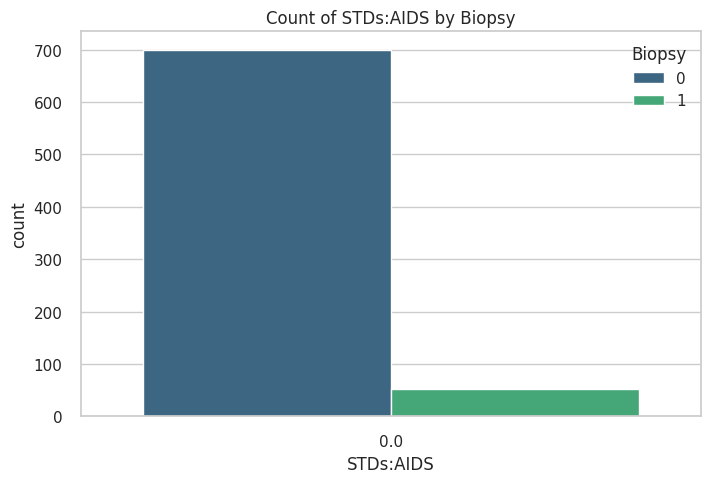

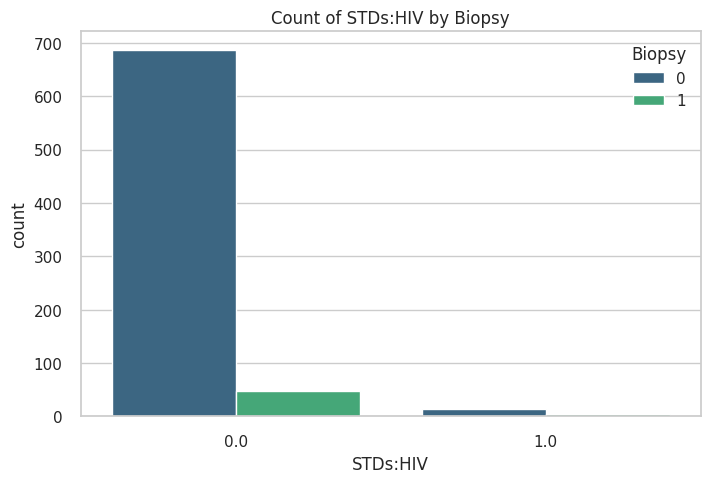

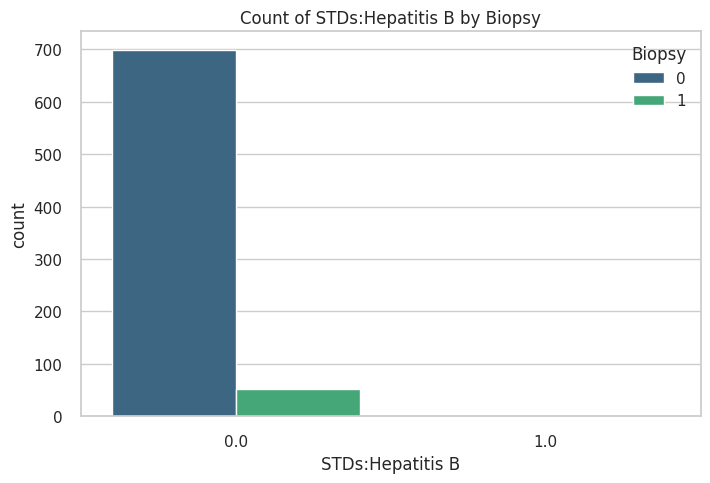

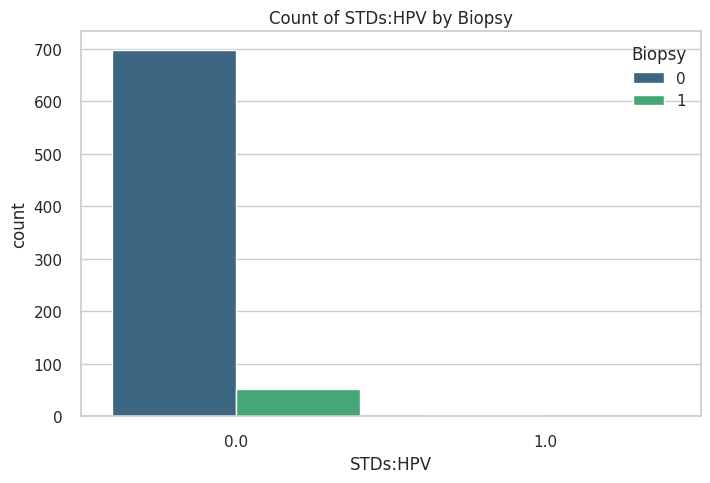

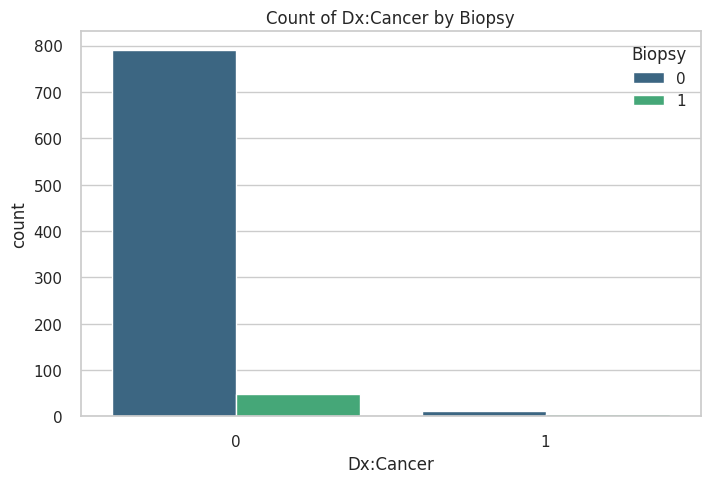

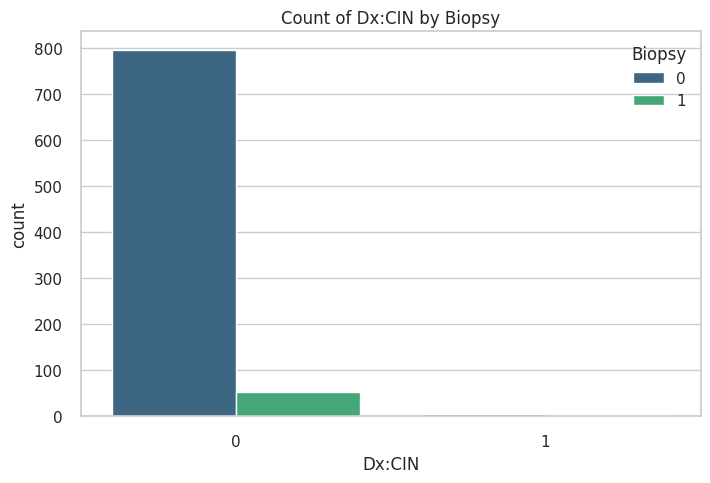

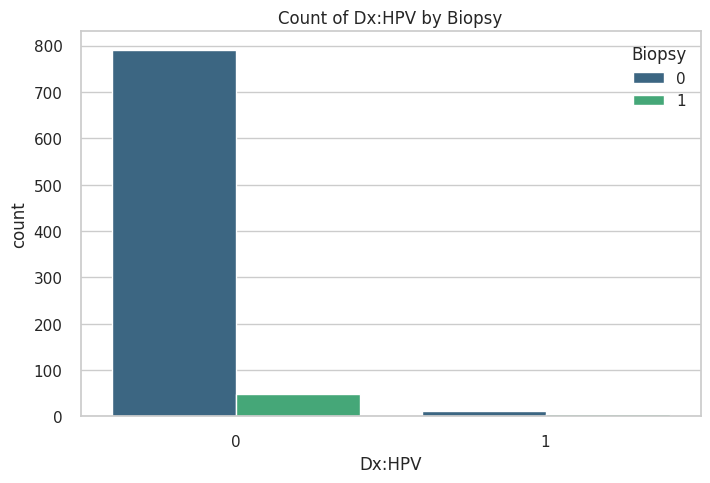

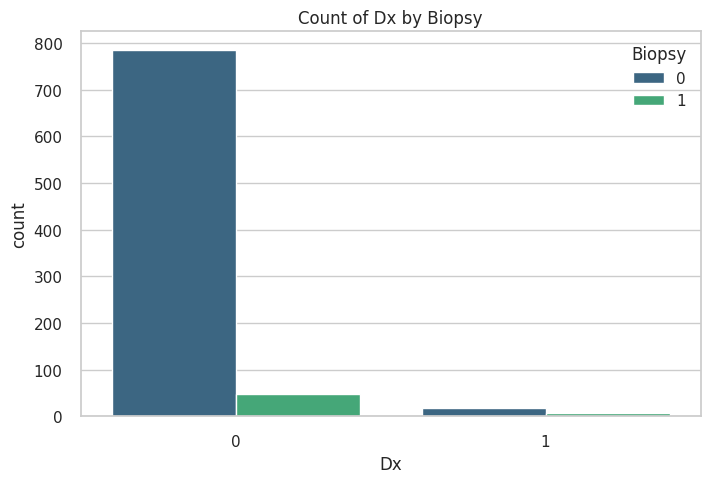

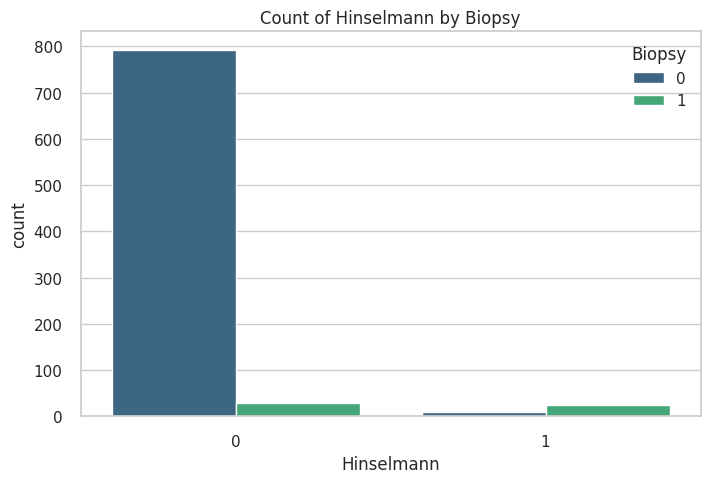

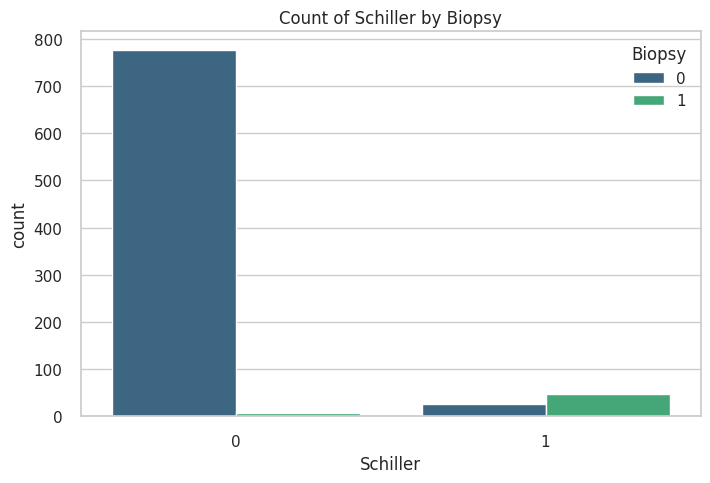

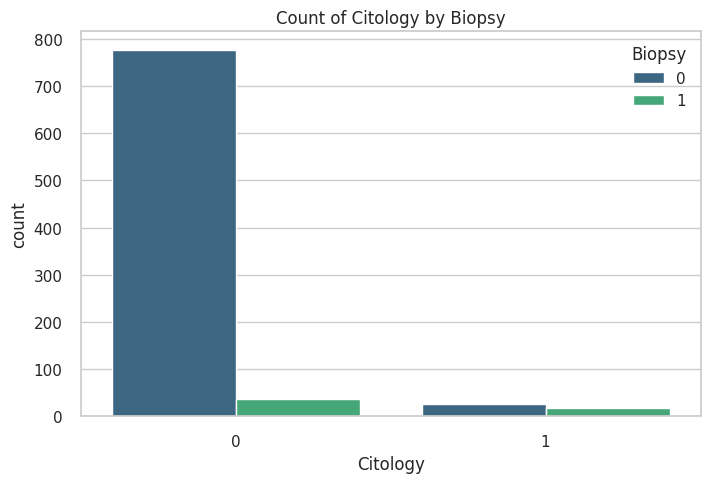

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for numerical features
num_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
            'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot count plots for categorical features
cat_cols = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
            'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
            'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']

for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='Biopsy', palette='viridis')
    plt.title(f'Count of {col} by Biopsy')
    plt.show()

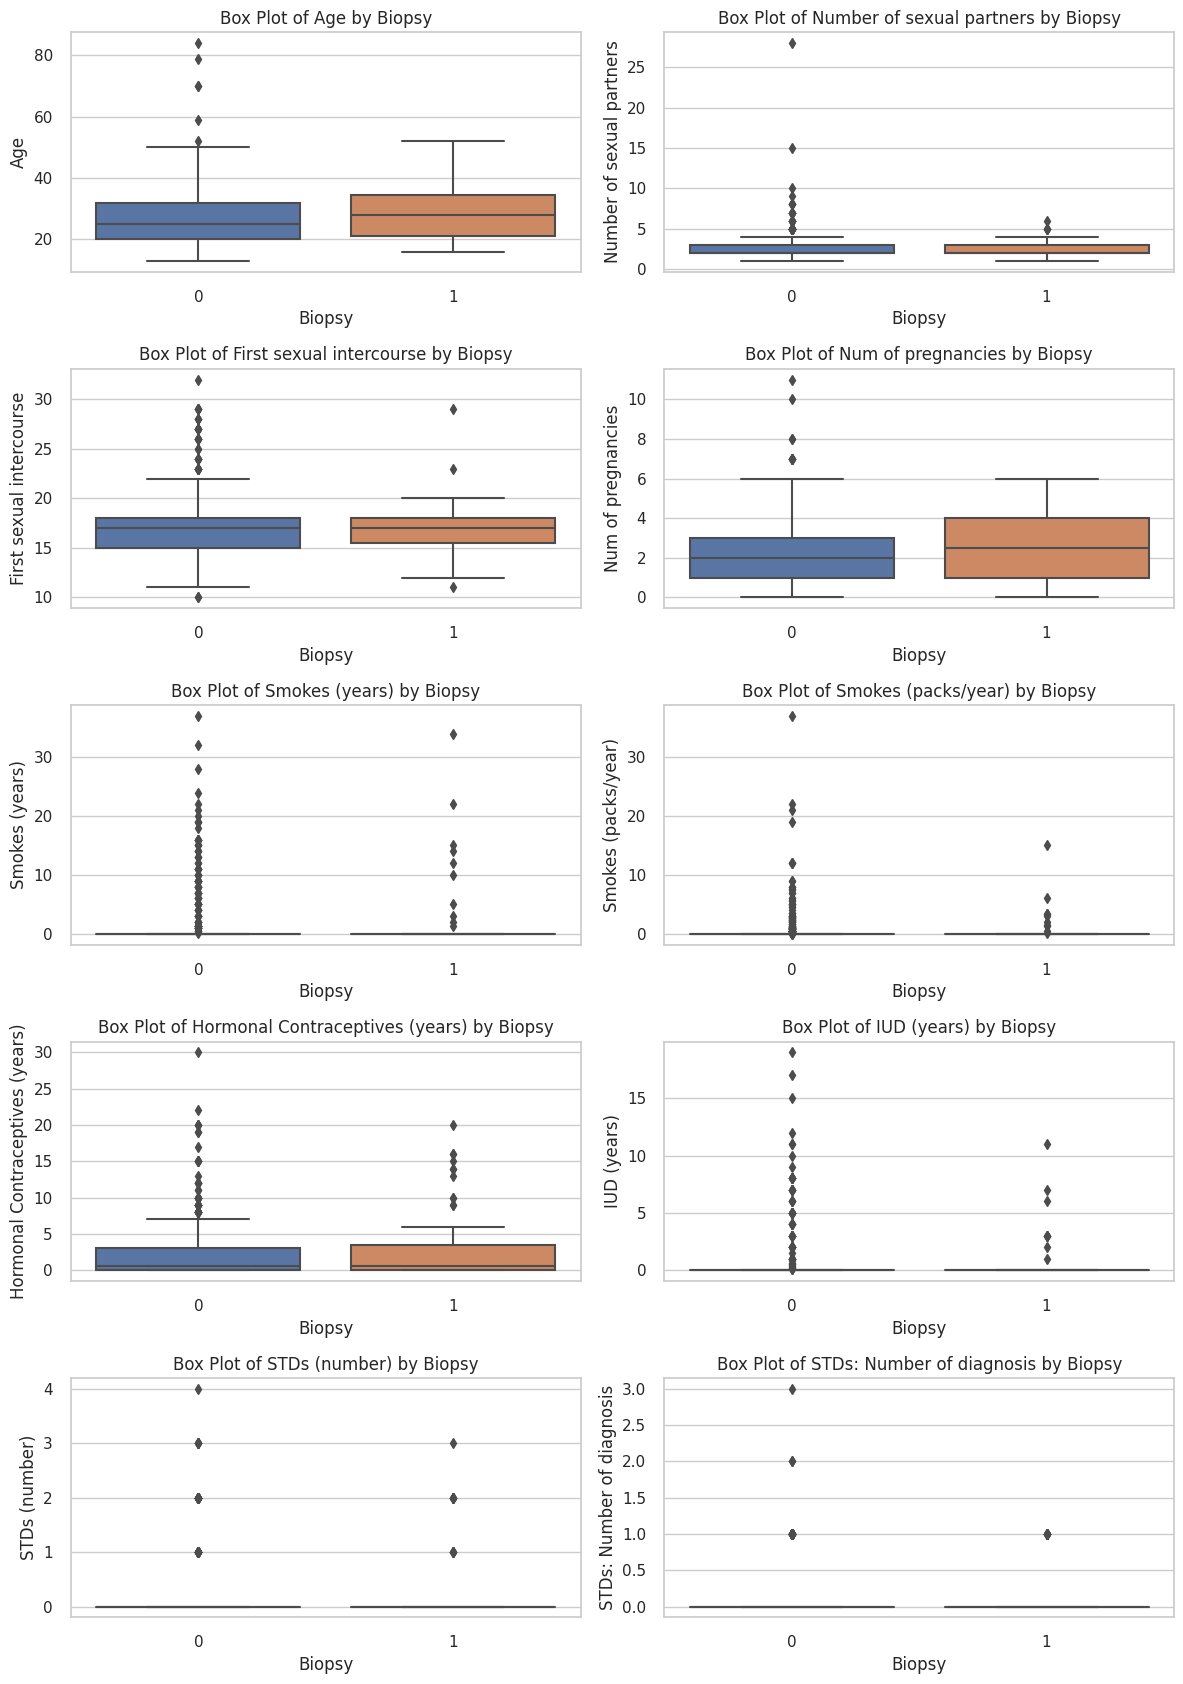

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select numerical features for box plots
numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
                  'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
                  'STDs (number)', 'STDs: Number of diagnosis']

# Define the number of rows and columns for subplots
rows = len(numerical_cols) // 2
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 17))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Create box plots for each numerical feature, distinguishing between classes
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Biopsy', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Biopsy')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# # prompt: make a scatter of all attributes of df

# plt.figure(figsize=(15, 10))
# sns.pairplot(df, hue='Biopsy', palette='viridis')
# plt.show()


In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
df=df.replace("?", np.nan)

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Since more than 90% of the values in columns: 'STDs: Time since first diagnosis' and  'STDs: Time since last diagnosis' are null. Dropping them seems to be an appropriate choice.

In [ ]:
df.drop(['STDs: Time since last diagnosis', 'STDs: Time since first diagnosis'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


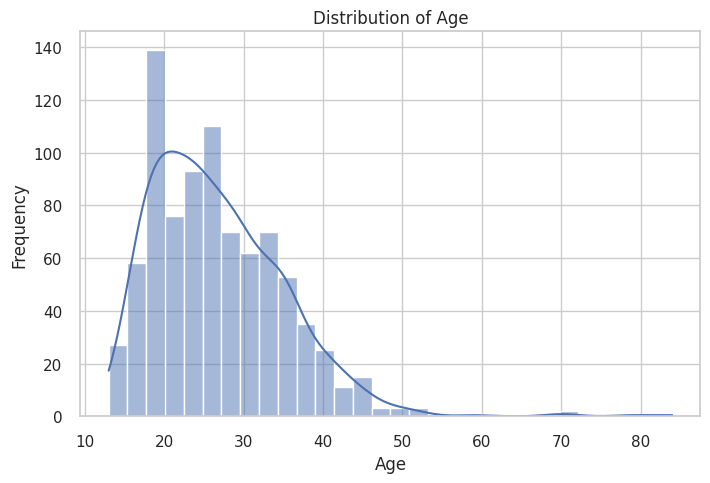

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

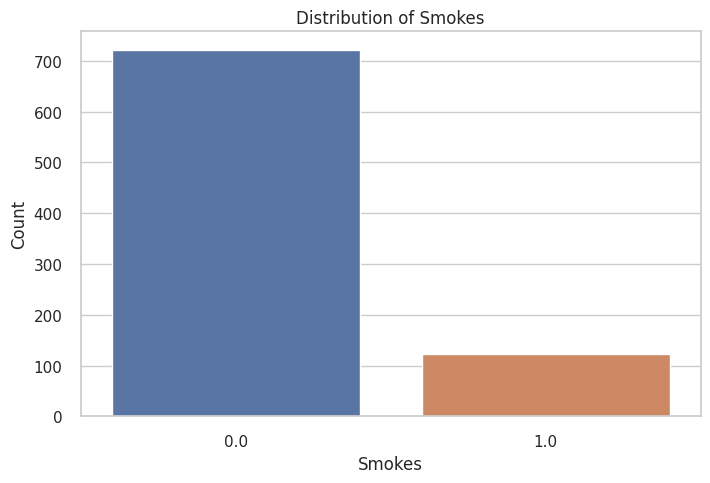

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Smokes', data=df)
plt.title('Distribution of Smokes')
plt.xlabel('Smokes')
plt.ylabel('Count')
plt.show()

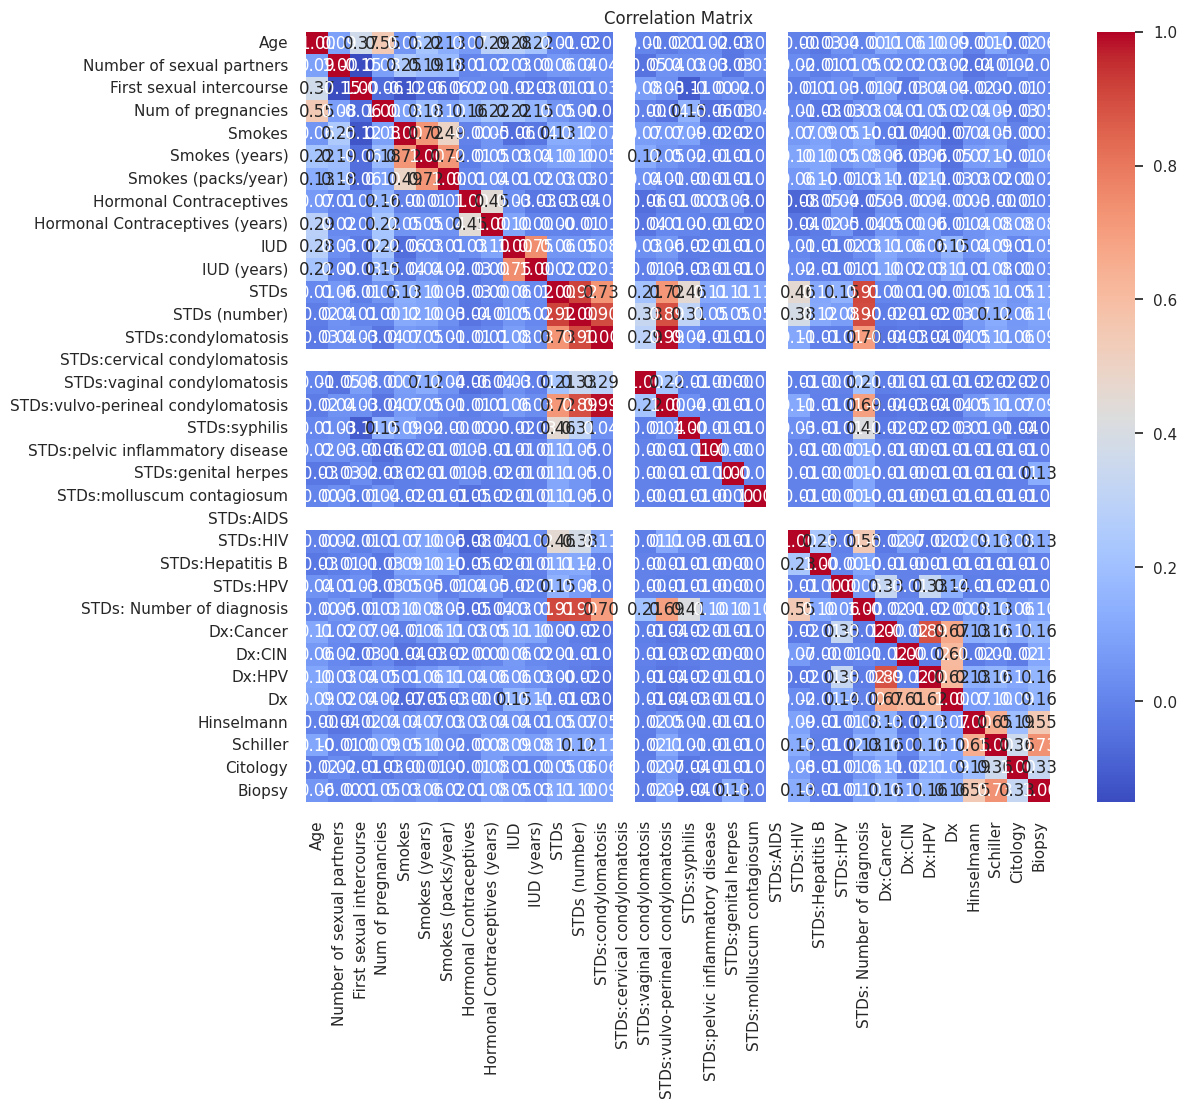

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

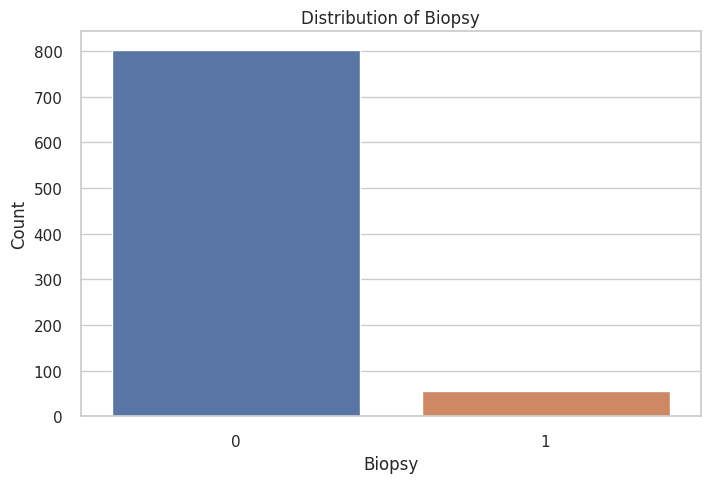

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Biopsy', data=df)
plt.title('Distribution of Biopsy')
plt.xlabel('Biopsy')
plt.ylabel('Count')
plt.show()

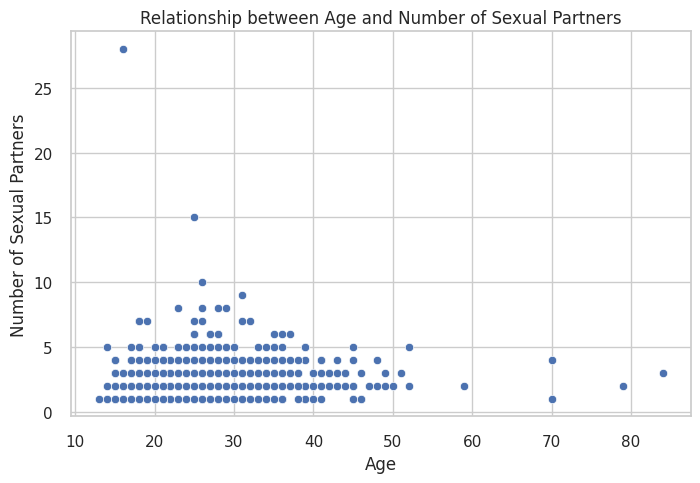

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Number of sexual partners', data=df)
plt.title('Relationship between Age and Number of Sexual Partners')
plt.xlabel('Age')
plt.ylabel('Number of Sexual Partners')
plt.show()

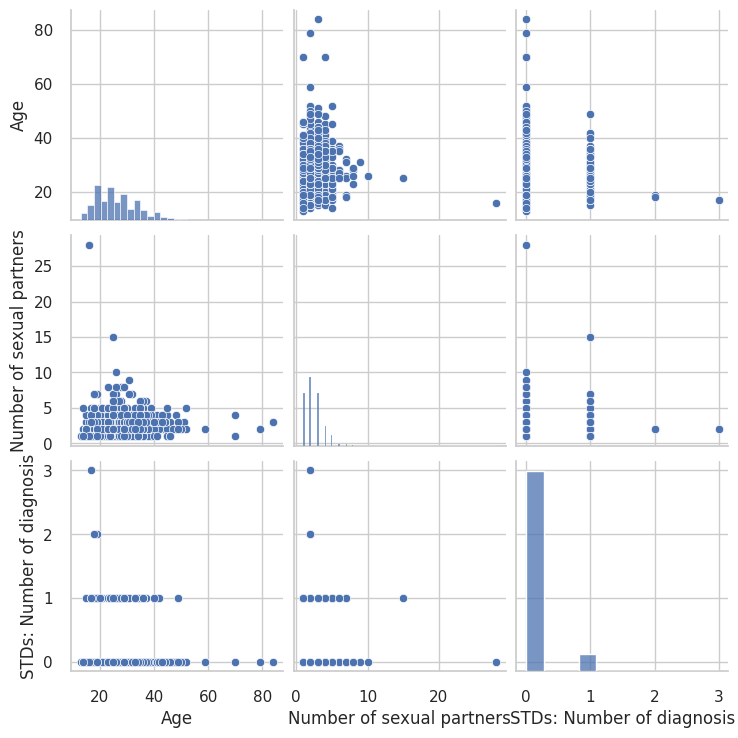

In [ ]:
sns.pairplot(df[['Age', 'Number of sexual partners', 'STDs: Number of diagnosis']])
plt.show()

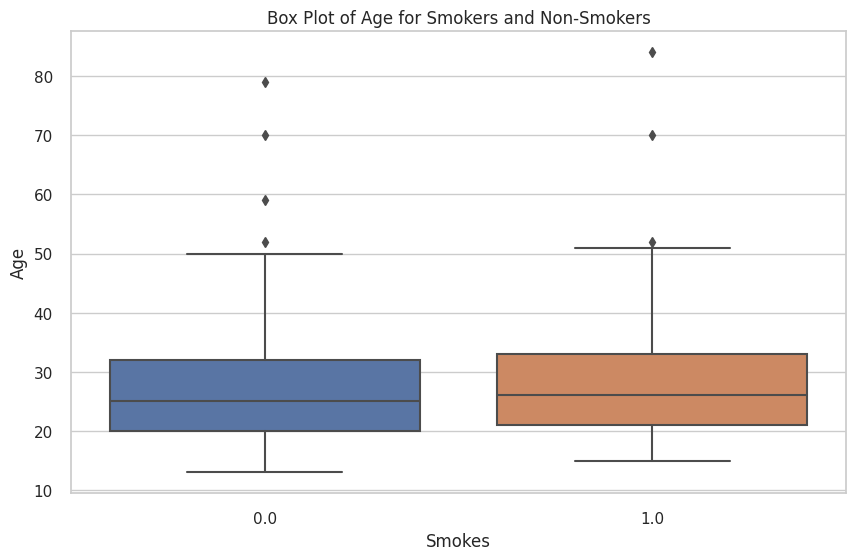

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smokes', y='Age', data=df)
plt.title('Box Plot of Age for Smokers and Non-Smokers')
plt.xlabel('Smokes')
plt.ylabel('Age')
plt.show()

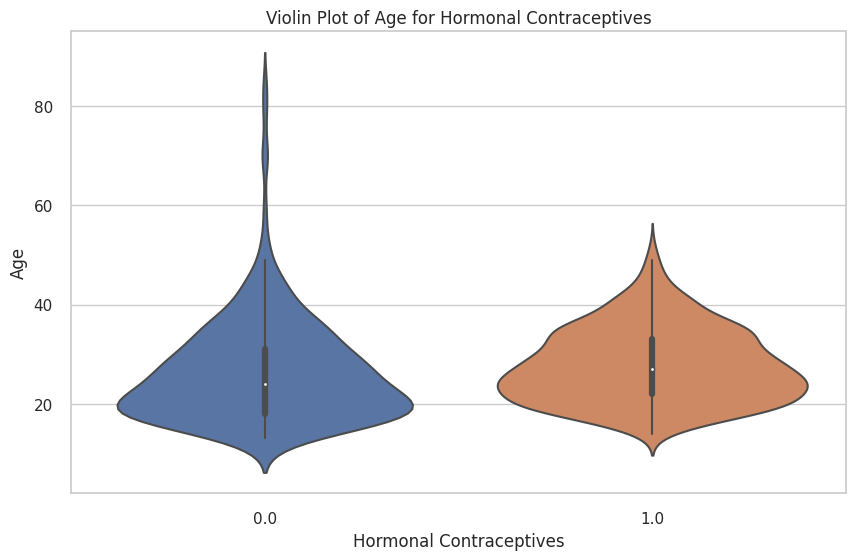

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Hormonal Contraceptives', y='Age', data=df)
plt.title('Violin Plot of Age for Hormonal Contraceptives')
plt.xlabel('Hormonal Contraceptives')
plt.ylabel('Age')
plt.show()

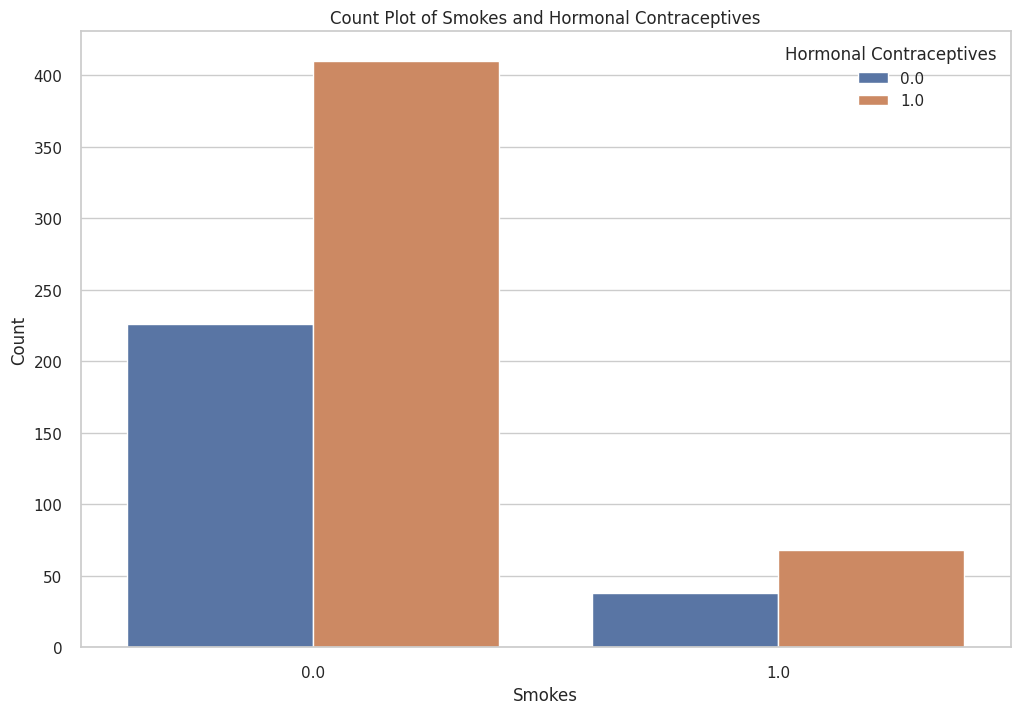

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Smokes', hue='Hormonal Contraceptives', data=df)
plt.title('Count Plot of Smokes and Hormonal Contraceptives')
plt.xlabel('Smokes')
plt.ylabel('Count')
plt.show()

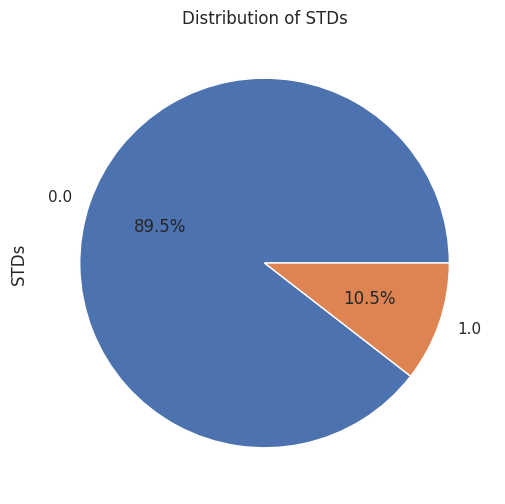

In [ ]:
plt.figure(figsize=(8, 6))
df['STDs'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of STDs')
plt.show()

In [ ]:
df=df.replace(np.nan, 0)

In [ ]:
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [ ]:
df['Number of sexual partners'] = pd.to_numeric(df['Number of sexual partners'], errors='coerce')
df['First sexual intercourse'] = pd.to_numeric(df['First sexual intercourse'], errors='coerce')
df['Num of pregnancies'] = pd.to_numeric(df['Num of pregnancies'], errors='coerce')
df['Smokes'] = pd.to_numeric(df['Smokes'], errors='coerce')
df['Smokes (years)'] = pd.to_numeric(df['Smokes (years)'], errors='coerce')
df['Smokes (packs/year)'] = pd.to_numeric(df['Smokes (packs/year)'], errors='coerce')
df['Hormonal Contraceptives'] = pd.to_numeric(df['Hormonal Contraceptives'], errors='coerce')
df['Hormonal Contraceptives (years)'] = pd.to_numeric(df['Hormonal Contraceptives (years)'], errors='coerce')
df['IUD'] = pd.to_numeric(df['IUD'], errors='coerce')
df['IUD (years)'] = pd.to_numeric(df['IUD (years)'], errors='coerce')
df['STDs'] = pd.to_numeric(df['STDs'], errors='coerce')
df['STDs (number)'] = pd.to_numeric(df['STDs (number)'], errors='coerce')
df['STDs:condylomatosis'] = pd.to_numeric(df['STDs:condylomatosis'], errors='coerce')
df['STDs:cervical condylomatosis'] = pd.to_numeric(df['STDs:cervical condylomatosis'], errors='coerce')
df['STDs:vaginal condylomatosis'] = pd.to_numeric(df['STDs:vaginal condylomatosis'], errors='coerce')
df['STDs:vulvo-perineal condylomatosis'] = pd.to_numeric(df['STDs:vulvo-perineal condylomatosis'], errors='coerce')
df['STDs:syphilis'] = pd.to_numeric(df['STDs:syphilis'], errors='coerce')
df['STDs:pelvic inflammatory disease'] = pd.to_numeric(df['STDs:pelvic inflammatory disease'], errors='coerce')
df['STDs:genital herpes'] = pd.to_numeric(df['STDs:genital herpes'], errors='coerce')
df['STDs:molluscum contagiosum'] = pd.to_numeric(df['STDs:molluscum contagiosum'], errors='coerce')
df['STDs:AIDS'] = pd.to_numeric(df['STDs:AIDS'], errors='coerce')
df['STDs:HIV'] = pd.to_numeric(df['STDs:HIV'], errors='coerce')
df['STDs:Hepatitis B'] = pd.to_numeric(df['STDs:Hepatitis B'], errors='coerce')
df['STDs:HPV'] = pd.to_numeric(df['STDs:HPV'], errors='coerce')


In [ ]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
y = df["Biopsy"]
X = df.drop(["Biopsy"], axis=1)

# Specify the test_size and random_state
test_size = 0.2
random_state = seed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform X_train
X_train_standardized = scaler.fit_transform(X_train)

# X_train_standardized is now the standardized version of X_train

In [ ]:
X_test=scaler.fit_transform(X_test)

In [ ]:
#Train the random forest classifier using training data
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=seed)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
y_pred=rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.9418604651162791

In [ ]:
#Evaulating which features the classifier finds important for making its decisions
feats = rfc.feature_importances_

#Create new instance of dataframe
feat_importances=pd.DataFrame()

#set columns in datafram to features and their importances
feat_importances["feature"]=X.columns
feat_importances["rfc"]=feats

#Display data
feat_importances

,feature,rfc
0,Age,1.016765e-01
1,Number of sexual partners,6.045555e-02
2,First sexual intercourse,7.948444e-02
3,Num of pregnancies,4.798433e-02
4,Smokes,8.909364e-03
5,Smokes (years),1.528311e-02
6,Smokes (packs/year),1.367531e-02
7,Hormonal Contraceptives,1.622362e-02
8,Hormonal Contraceptives (years),6.735339e-02
9,IUD,1.116070e-02


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
def hptuning(model,param_grid,X_train,y_train,cv):
    grid_search = GridSearchCV(model,param_grid,cv=cv,return_train_score= True,n_jobs= -1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print("Best Hyperparameters:", best_params)
    print("Best Mean Test Score:", best_score)
    mean_train= grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
    mean_test= grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    train_std= grid_search.cv_results_['std_train_score'][grid_search.best_index_]
    test_std= grid_search.cv_results_['std_test_score'][grid_search.best_index_]
    print("Mean Train score :" , mean_train)
    print('Std on Train set', train_std)
    print(" Mean Test score:" , mean_test)
    print('Std on Test set:', test_std)
    bestestimator = grid_search.best_estimator_
    y_pred = bestestimator.predict(X_train)
    print(classification_report(y_train, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

    print("------------------------------------------------------------------")

    return bestestimator

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import numpy as np

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1),
    GradientBoostingClassifier(random_state=42)
    ]

names = ["KNC", "Linear SVC", "SVC", "RFC", "MLP", "GBC"]


clfs = list(zip(classifiers, names))

for clf, n in clfs:
    clf.fit(X_train, y_train)
    preds = np.rint(clf.predict(X_test))
    print(n, accuracy_score(y_test, preds))

vclf = VotingClassifier(estimators=clfs, voting="hard")

KNC 0.936046511627907
Linear SVC 0.9534883720930233
SVC 0.936046511627907
RFC 0.936046511627907
MLP 0.9127906976744186
GBC 0.9244186046511628


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=1, n_estimators=100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#Evaluating the classifier using test set
from sklearn.metrics import accuracy_score
gbcy_pred=gbc.predict(X_test)
accuracy_score(gbcy_pred, y_test)

0.9593023255813954

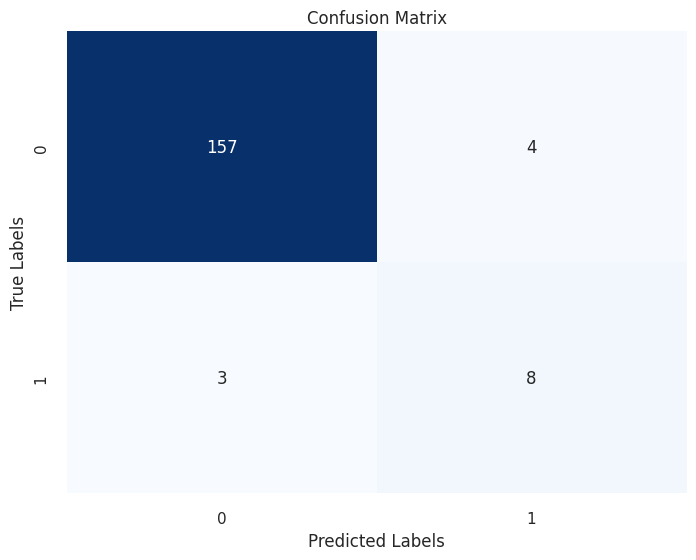

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, gbcy_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, gbcy_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       161
           1       0.67      0.73      0.70        11

    accuracy                           0.96       172
   macro avg       0.82      0.85      0.84       172
weighted avg       0.96      0.96      0.96       172



Best Hyperparameters: {'learning_rate': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 42}
Best Mean Test Score: 0.9533269861419656
Mean Train score : 0.9752203741374498
Std on Train set 0.00355969841895662
 Mean Test score: 0.9533269861419656
Std on Test set: 0.01359303717832526
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       642
           1       0.72      0.86      0.78        44

    accuracy                           0.97       686
   macro avg       0.85      0.92      0.88       686
weighted avg       0.97      0.97      0.97       686

------------------------------------------------------------------


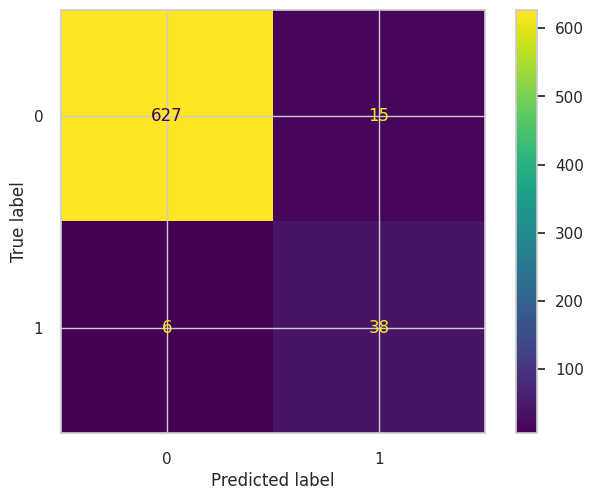

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'random_state': [42]
}
bestmodel = hptuning(gbc,param_grid,X_train,y_train,5)

In [ ]:
# Setup PyCaret
from pycaret.classification import *
clf_setup = setup(df, target='Biopsy')

,Description,Value
0,Session id,2846
1,Target,Biopsy
2,Target type,Binary
3,Original data shape,"(858, 34)"
4,Transformed data shape,"(858, 34)"
5,Transformed train set shape,"(600, 34)"
6,Transformed test set shape,"(258, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9600,0.9548,0.6083,0.7267,0.6443,0.6243,0.6362,0.1380
ada,Ada Boost Classifier,0.9550,0.8505,0.5250,0.7583,0.5817,0.5602,0.5895,0.1960
ridge,Ridge Classifier,0.9533,0.0000,0.6500,0.6850,0.6398,0.6157,0.6298,0.0260
lda,Linear Discriminant Analysis,0.9517,0.9335,0.8167,0.6307,0.6952,0.6704,0.6860,0.0370
lr,Logistic Regression,0.9500,0.9277,0.4667,0.6833,0.5357,0.5107,0.5304,0.3450
rf,Random Forest Classifier,0.9483,0.9408,0.4000,0.6583,0.4698,0.4468,0.4747,0.3160
gbc,Gradient Boosting Classifier,0.9483,0.9366,0.6000,0.6567,0.6002,0.5734,0.5878,0.1970
xgboost,Extreme Gradient Boosting,0.9483,0.9448,0.5583,0.6667,0.5583,0.5330,0.5593,0.0640
dt,Decision Tree Classifier,0.9450,0.7956,0.6250,0.6433,0.5717,0.5453,0.5761,0.0270
et,Extra Trees Classifier,0.9433,0.9267,0.4500,0.6100,0.4929,0.4645,0.4830,0.1550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
modelcomparison = {
    'Model': ['lda', 'ridge', 'lr', 'gbc', 'rf', 'et', 'xgboost', 'ada', 'lightgbm', 'svm', 'dt', 'knn', 'dummy', 'qda', 'nb'],
    'Accuracy': [0.9667, 0.9633, 0.9600, 0.9600, 0.9567, 0.9550, 0.9533, 0.9517, 0.9517, 0.9433, 0.9417, 0.9400, 0.9367, 0.9317, 0.2250],
    'Recall': [0.8667, 0.8167, 0.6083, 0.7167, 0.5833, 0.6417, 0.6250, 0.5750, 0.6417, 0.4833, 0.5500, 0.0500, 0.0000, 0.0250, 0.9667]
}

# Create DataFrame
model_df = pd.DataFrame(modelcomparison)

# Display the DataFrame
model_df

,Model,Accuracy,Recall
0,lda,0.9667,0.8667
1,ridge,0.9633,0.8167
2,lr,0.9600,0.6083
3,gbc,0.9600,0.7167
4,rf,0.9567,0.5833
5,et,0.9550,0.6417
6,xgboost,0.9533,0.6250
7,ada,0.9517,0.5750
8,lightgbm,0.9517,0.6417
9,svm,0.9433,0.4833


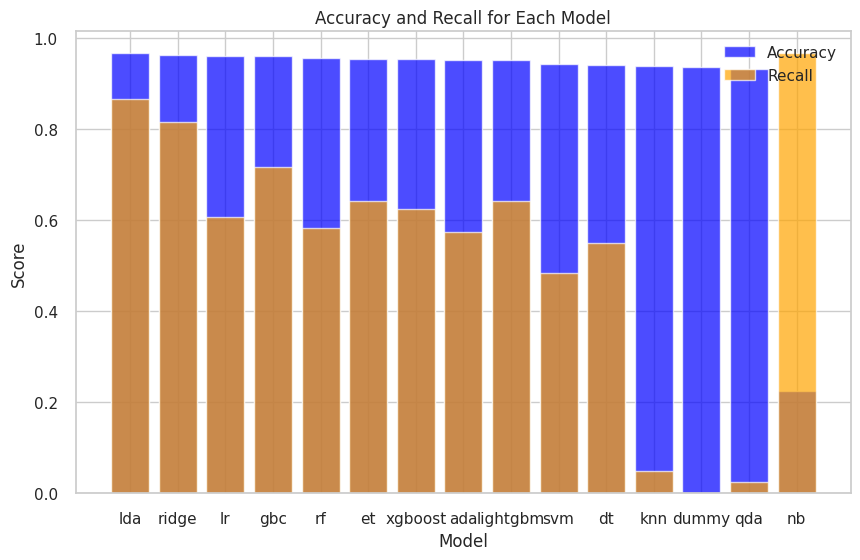

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Accuracy
ax.bar(model_df['Model'], model_df['Accuracy'], label='Accuracy', color='blue', alpha=0.7)

# Plot Recall
ax.bar(model_df['Model'], model_df['Recall'], label='Recall', color='orange', alpha=0.7)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Accuracy and Recall for Each Model')
ax.legend()

# Show the plot
plt.show()

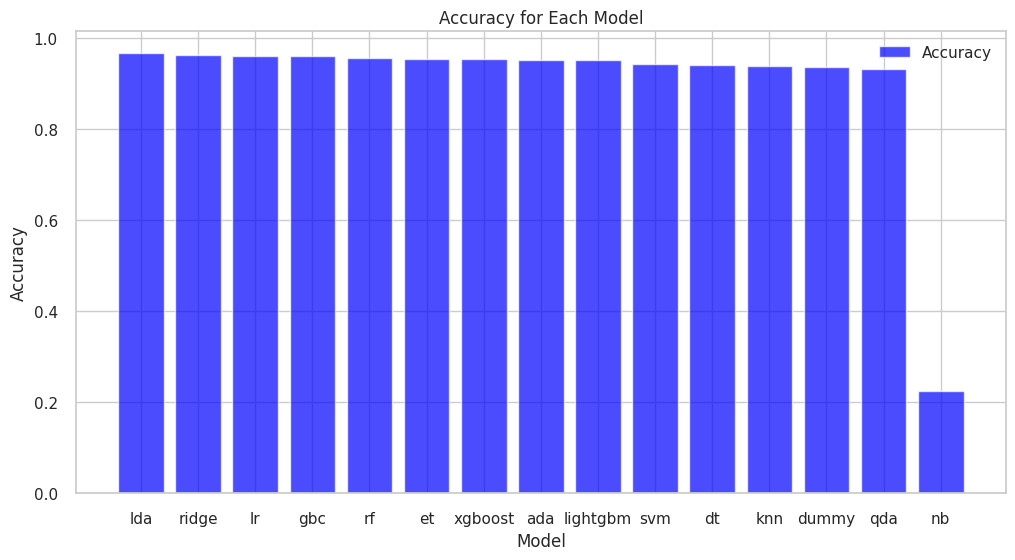

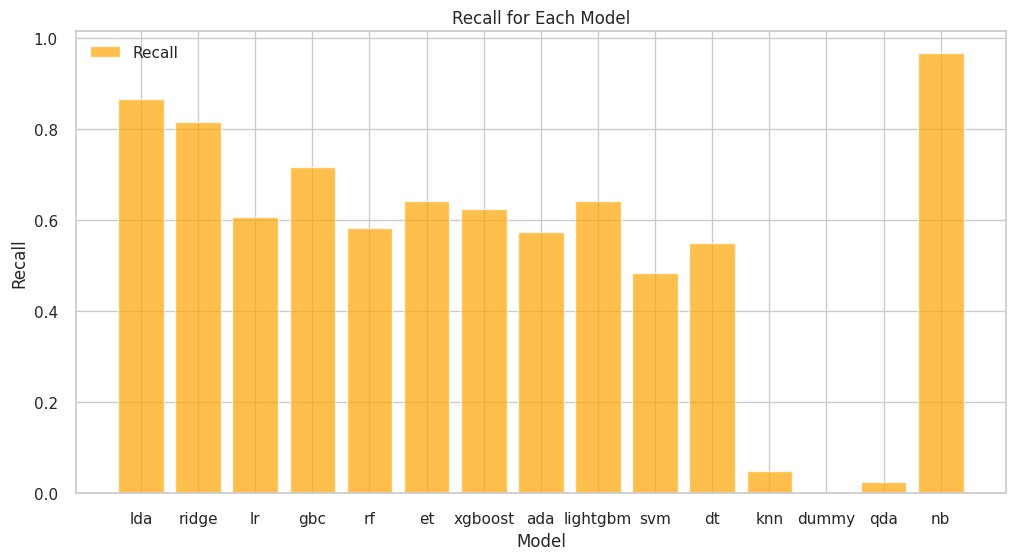

In [ ]:

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.bar(model_df['Model'], model_df['Accuracy'], color='blue', alpha=0.7, label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Model')
plt.legend()
plt.show()

# Plotting Recall
plt.figure(figsize=(12, 6))
plt.bar(model_df['Model'], model_df['Recall'], color='orange', alpha=0.7, label='Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall for Each Model')
plt.legend()
plt.show()


In [ ]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9667,0.9883,1.0000,0.6000,0.7500,0.7333,0.7609
1,0.9833,1.0000,0.6667,1.0000,0.8000,0.7917,0.8094
2,0.9500,0.8304,0.5000,0.6667,0.5714,0.5455,0.5518
3,0.9833,1.0000,0.7500,1.0000,0.8571,0.8485,0.8584
4,0.9500,0.9598,0.7500,0.6000,0.6667,0.6400,0.6447
5,0.9667,0.9821,0.7500,0.7500,0.7500,0.7321,0.7321
6,0.9667,0.9643,0.7500,0.7500,0.7500,0.7321,0.7321
7,0.9833,0.7857,0.7500,1.0000,0.8571,0.8485,0.8584
8,0.9500,0.9397,0.5000,0.6667,0.5714,0.5455,0.5518


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
predictions = predict_model(final_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9767,0.9907,0.8000,0.8302,0.8148,0.8024,0.8025


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [ ]:
predictions

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,prediction_label,prediction_score
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0.9971
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0.9966
2,34,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0.9947
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,1,0,1,0,0,0,0,0,0,0.9916
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0,0,0,0,0,0,0,0,0,0.9904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0.9832
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0,0,0,0,0,0,0,0,0,0.9984
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,0,0,0,0,0,1,0,0,0.9554
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,0,0,0,0,0,0,0,0,0.9959


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(covariance_estimator=None,n_components=None ,priors=None, shrinkage = None,solver='svd',store_covariance=False,tol=0.0001 )

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9418604651162791

Confusion Matrix:
 [[152   9]
 [  1  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       161
           1       0.53      0.91      0.67        11

    accuracy                           0.94       172
   macro avg       0.76      0.93      0.82       172
weighted avg       0.96      0.94      0.95       172



Best Hyperparameters: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best Mean Test Score: 0.9606156775626786
Mean Train score : 0.96355550237326
Std on Train set 0.003834827978135785
 Mean Test score: 0.9606156775626786
Std on Test set: 0.011906864092606429
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       642
           1       0.67      0.86      0.75        44

    accuracy                           0.96       686
   macro avg       0.83      0.92      0.87       686
weighted avg       0.97      0.96      0.97       686

------------------------------------------------------------------


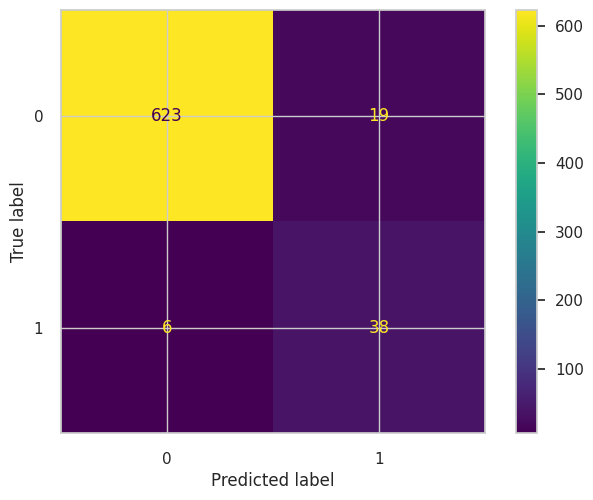

In [ ]:
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
}
ldamodeltuned = hptuning(lda,param_grid_lda,X_train,y_train,5)

In [ ]:
save_model(final_model, 'path_to_save_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Number of sexual partners',
                                              'First sexual intercourse',
                                              'Num of pregnancies', 'Smokes',
                                              'Smokes (years)',
                                              'Smokes (packs/year)',
                                              'Hormonal Contraceptives',
                                              'Hormonal Contraceptives (years)',
                                              'IUD', 'IUD (years)', 'STDs',
                                              'STDs (number)',
                                              'STDs:condylomatosis',
                                              'S...
                                 boosting_type='gbdt', class_weight=None,
               